In [ ]:
# Assignment 1 : Birthday Paradox
# Name : Nevish Pathe
# Roll No. : 220757

# Assignment 2

## Birthday Paradox

The problem is to find the number of students $k$ such that probability of atleast two students having the same birthday exceeds $p$

Let $p(k)$ be the probability that atleast two students have the same birthday, out ok $k$ students.
Thus, $p(k) = 1 - p'(k)$, where $p'(k)$ is the probability of all birthdays being distinct

$$p'(k) = \frac{365 \cdot 364 \cdot 363 \cdot 362 \cdot \cdot \cdot (365-k-3) \cdot (365-k-2) \cdot (365-k-1)}{365 \cdot 365 \cdot 365 \cdot 365 \cdot \cdot \cdot 365 \cdot 365 \cdot 365 }$$


We need to find $k$ such that $p < p(k) = 1 - \frac{365!}{(365-k)!}\cdot \frac{1}{365^k}$
or alternatively



$$\log{(1 - p)} > \log{(365!)} - \log{((365-k)!)} - k \log{365}$$

In [ ]:
from math import log as log

def log_fact(x):

    if(x == 1):
      return 1

    ans = 0
    while(x != 1):
      ans += (log(x))
      x -= 1

    return ans

def log_fact_stirling(x):

    return (x * log(x) - x)

def does_it(p, k):
    return (log(1 - p) > log_fact(365) - log_fact(365 - k) - k * log(365))

def does_it_stirling(p, k):
    return (log(1 - p) > log_fact_stirling(365) - log_fact_stirling(365 - k) - k * log(365))

def find_number_of_students(p):
    lo = 0
    hi = 366

    while lo < hi:
        mid = (lo + hi) // 2
        if does_it(p, mid):
            hi = mid
        else:
            lo = mid + 1
    return lo

def find_number_of_students_stirling(p):
    lo = 0
    hi = 366

    while lo < hi:
        mid = (lo + hi) // 2
        if does_it_stirling(p, mid):
            hi = mid
        else:
            lo = mid + 1
    return lo

if __name__ == "__main__":
    p = float(input("Enter the probability (p): "))
    k = find_number_of_students(p)
    k_ = find_number_of_students_stirling(p)
    print(f"The minimum number of students in the class is: {k}")
    print(f"The minimum number of students in the class is (using Stirling's Approximation): {k_}")


Enter the probability (p): 0.5
The minimum number of students in the class is: 23
The minimum number of students in the class is (using Stirling's Approximation): 23


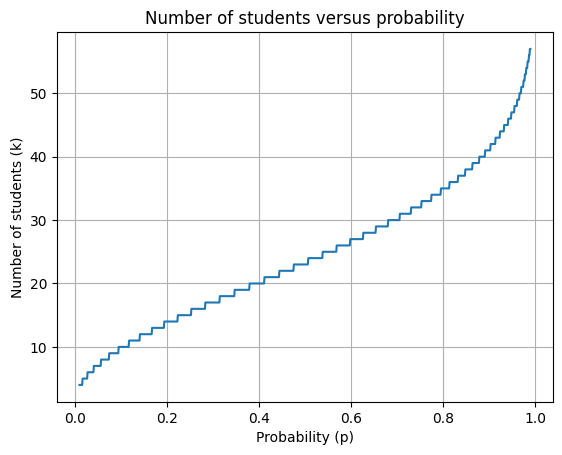

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

probabilities = np.linspace(0.01, 0.99, 1000)
students = [find_number_of_students(p) for p in probabilities]

plt.plot(probabilities, students)
plt.xlabel('Probability (p)')
plt.ylabel('Number of students (k)')
plt.title('Number of students versus probability')
plt.grid(True)
plt.show()